Let's start by checking the general information and summary statistics of the dataset. ​​

Insights from Initial Analysis
Missing Values:

Columns Resolution, First Response Time, Time to Resolution, and Customer Satisfaction Rating have significant missing values.


- Loads and preprocesses the data.
- Converts date columns to datetime and creates new features.
- Handles missing values.

Visualizes the data through various plots:
- Monthly ticket distribution.
- Distribution of ticket types, priority levels, and channels.
- Customer age and gender distribution.
- Distribution of response and resolution times.
- Ticket submissions by hour of the day.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'customer_support_tickets.csv'
data = pd.read_csv(file_path)

# Check data types and missing values
data.info()

# Summary statistics
data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,8469.000000,8469,8469,8469.000000,8469,8469,8469,8469,8469,8469,8469,2769,8469,8469,5650,2769,2769.000000
unique,NaN,8028,8320,NaN,3,42,730,5,16,8077,3,2769,4,4,5470,2728,NaN
top,NaN,Michael Garcia,bsmith@example.com,NaN,Male,Canon EOS,2020-10-21,Refund request,Refund request,I'm having an issue with the {product_purchase...,Pending Customer Response,Case maybe show recently my computer follow.,Medium,Email,2023-06-01 15:21:42,2023-06-01 17:14:42,NaN
freq,NaN,5,4,NaN,2896,240,24,1752,576,25,2881,1,2192,2143,3,3,NaN
mean,4235.000000,NaN,NaN,44.026804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.991333
std,2444.934048,NaN,NaN,15.296112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.407016
min,1.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2118.000000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,4235.000000,NaN,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,6352.000000,NaN,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


In [16]:

# Convert date columns to datetime
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['First Response Time'] = pd.to_datetime(data['First Response Time'], errors='coerce')
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], errors='coerce')

# Create new features from datetime columns
data['Purchase Year'] = data['Date of Purchase'].dt.year
data['Purchase Month'] = data['Date of Purchase'].dt.month
data['Purchase Day'] = data['Date of Purchase'].dt.day
data['Response Hour'] = data['First Response Time'].dt.hour

# Calculate Response Time and Resolution Time
data['Response Time'] = (data['First Response Time'] - data['Date of Purchase']).dt.total_seconds() / 3600.0
data['Resolution Time'] = (data['Time to Resolution'] - data['First Response Time']).dt.total_seconds() / 3600.0

# Handle missing values
data['Resolution'].fillna('No Resolution', inplace=True)
data['Customer Satisfaction Rating'].fillna(data['Customer Satisfaction Rating'].mean(), inplace=True)

# Set up the visual style
sns.set(style="whitegrid")

# Display the first few rows to verify changes
print(data.head())

   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibil

## Exploratory Data Analysis (EDA)

To understand the data and identify patterns, let's conduct some exploratory data analysis.

1. General Information:

- Check the data types and missing values.
- Summary statistics.

2. Data Visualization:

- Distribution of tickets over time.
- Breakdown by ticket type, priority, and channel.
- Customer demographics (age, gender).

3. Peak Demand Periods:

- Identify peak hours, days, and months.

4. Case Volume Forecasting:

- Time series analysis for predicting case volume.

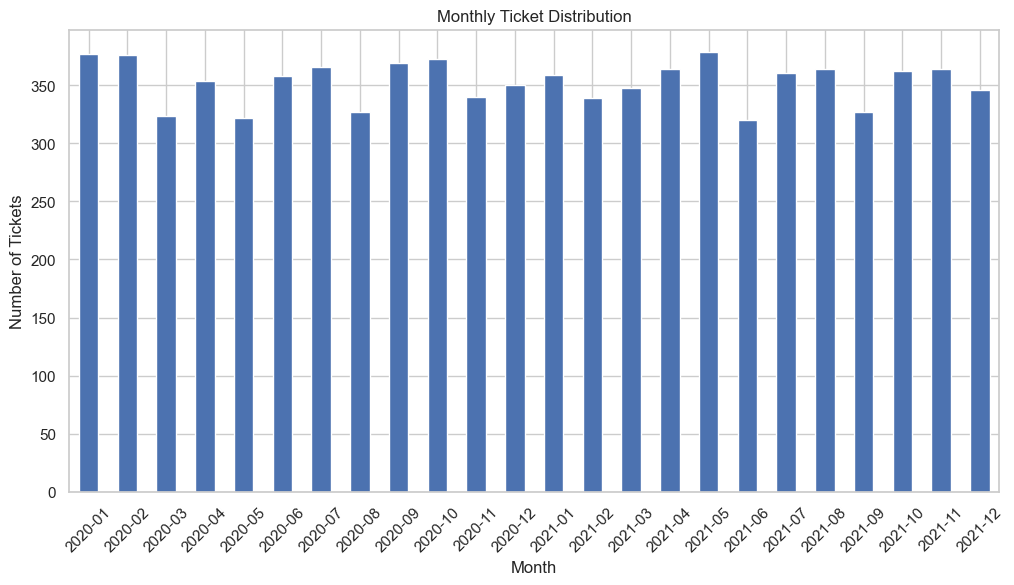

In [14]:


# 1. Ticket Distribution Over Time (Monthly)
data['Ticket Created Month'] = data['Date of Purchase'].dt.to_period('M')
monthly_tickets = data['Ticket Created Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_tickets.plot(kind='bar')
plt.title('Monthly Ticket Distribution')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.show()



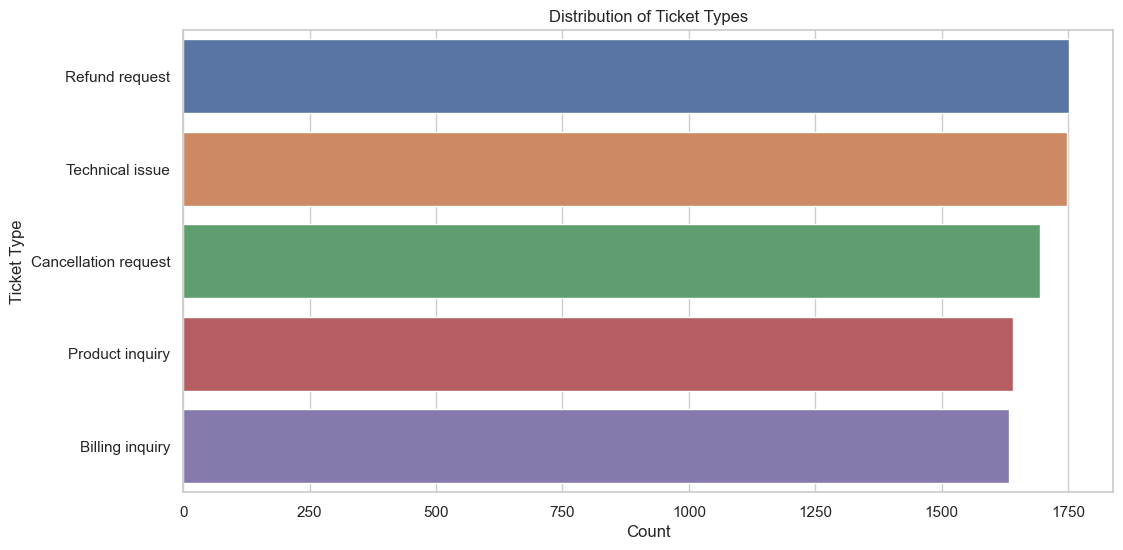

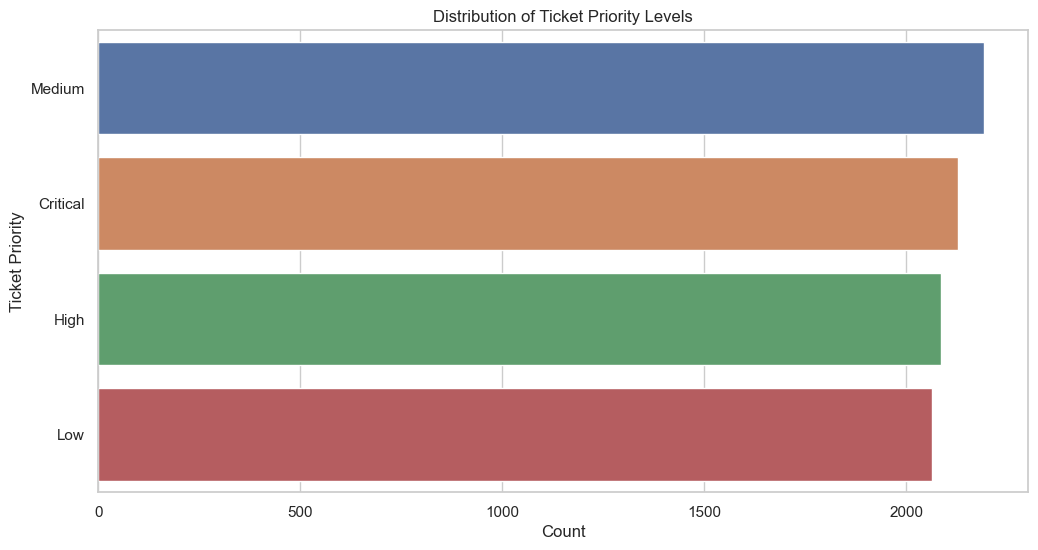

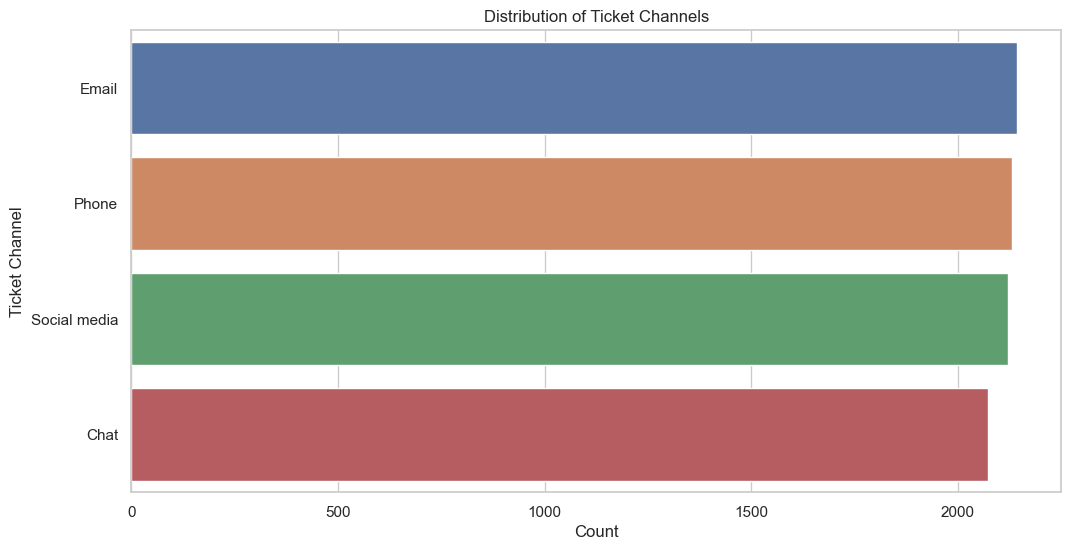

In [6]:
# 2. Distribution of Ticket Types
plt.figure(figsize=(12, 6))
sns.countplot(y='Ticket Type', data=data, order=data['Ticket Type'].value_counts().index)
plt.title('Distribution of Ticket Types')
plt.xlabel('Count')
plt.ylabel('Ticket Type')
plt.show()


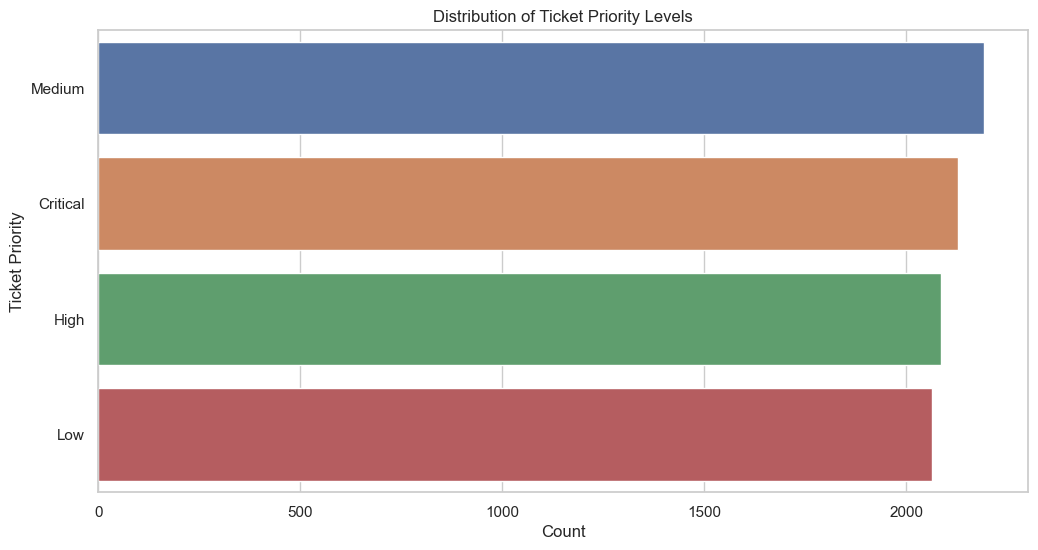

In [8]:

# 3. Distribution of Ticket Priority Levels
plt.figure(figsize=(12, 6))
sns.countplot(y='Ticket Priority', data=data, order=data['Ticket Priority'].value_counts().index)
plt.title('Distribution of Ticket Priority Levels')
plt.xlabel('Count')
plt.ylabel('Ticket Priority')
plt.show()


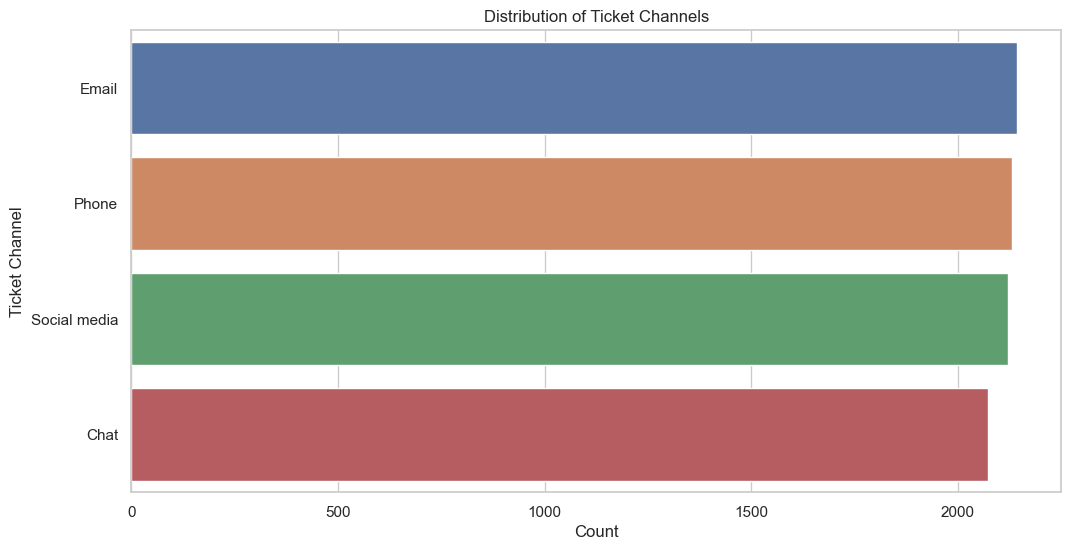

In [9]:
# 4. Distribution of Ticket Channels
plt.figure(figsize=(12, 6))
sns.countplot(y='Ticket Channel', data=data, order=data['Ticket Channel'].value_counts().index)
plt.title('Distribution of Ticket Channels')
plt.xlabel('Count')
plt.ylabel('Ticket Channel')
plt.show()


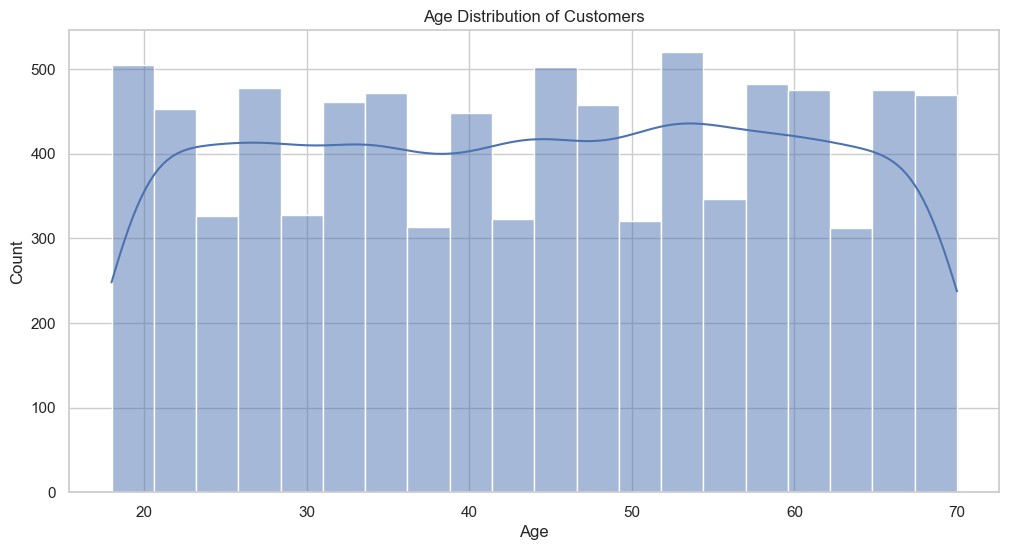

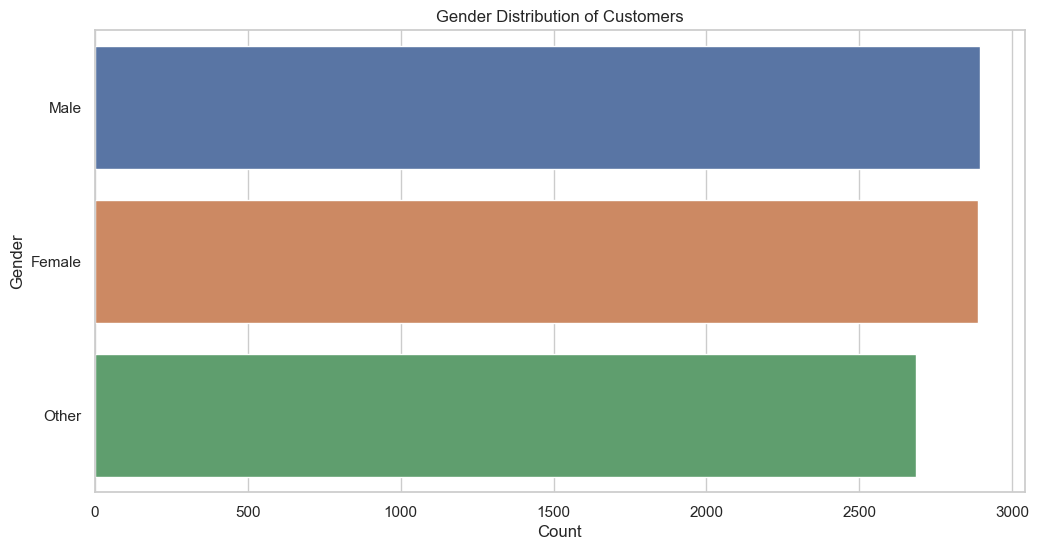

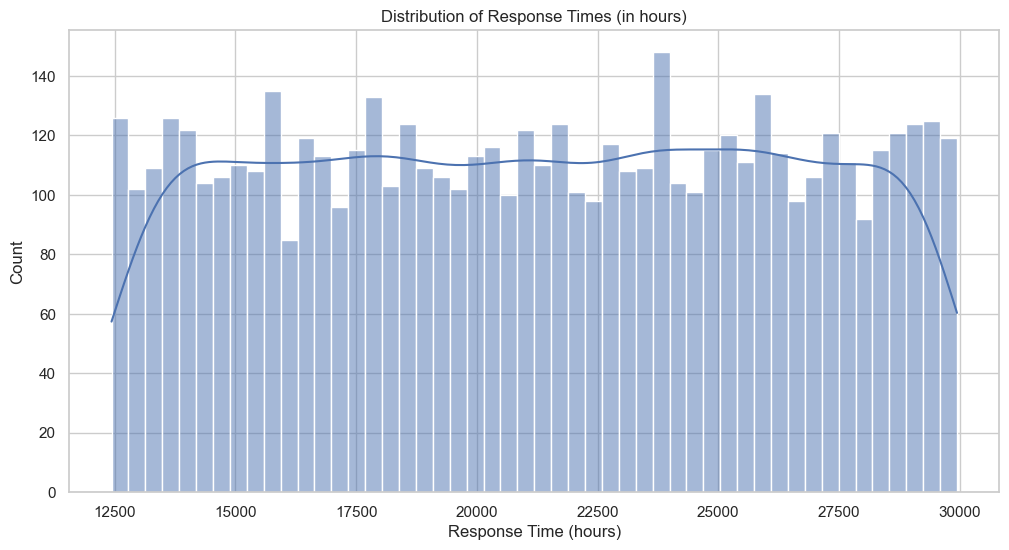

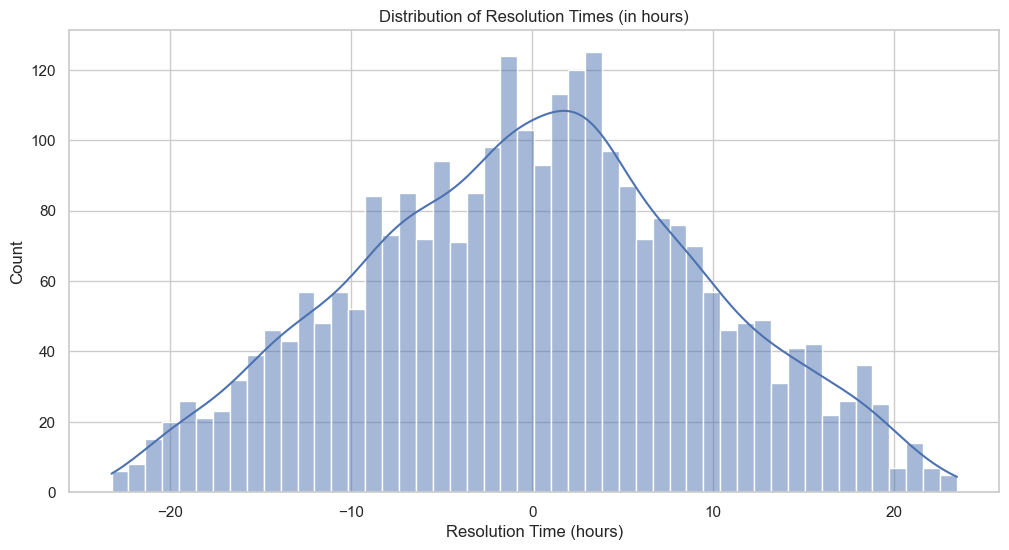

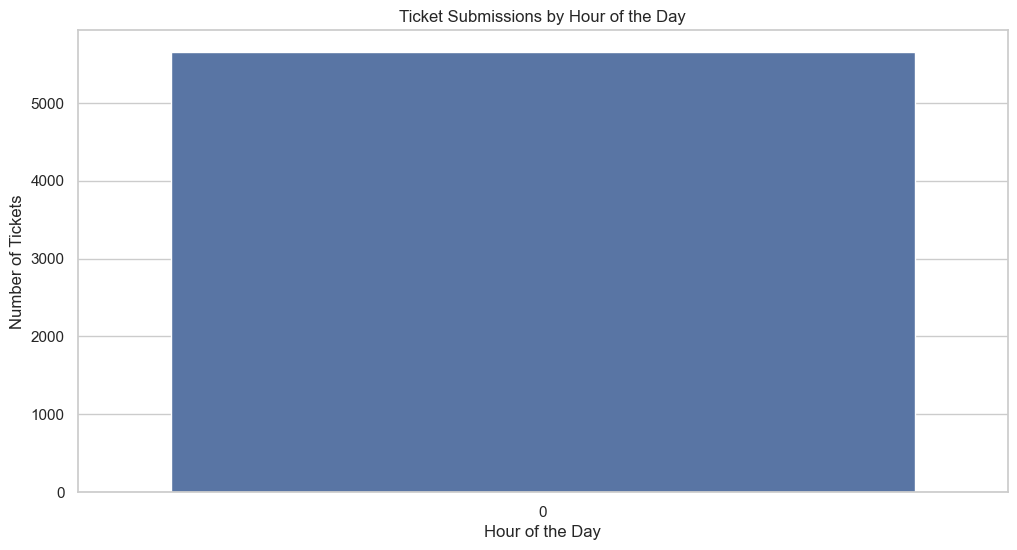

In [7]:

# 5. Age Distribution of Customers
plt.figure(figsize=(12, 6))
sns.histplot(data['Customer Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


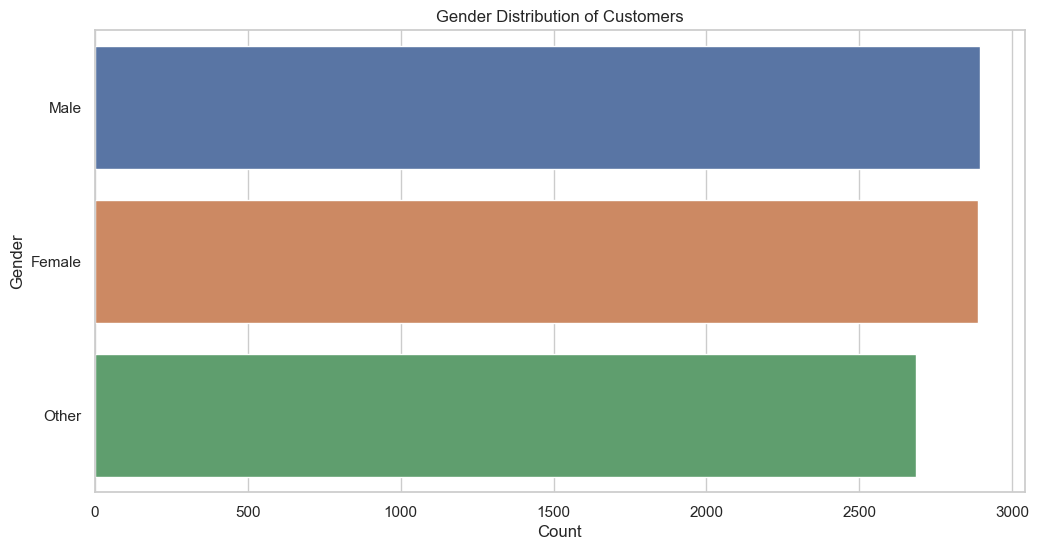

In [10]:
# 6. Gender Distribution of Customers
plt.figure(figsize=(12, 6))
sns.countplot(y='Customer Gender', data=data, order=data['Customer Gender'].value_counts().index)
plt.title('Gender Distribution of Customers')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()


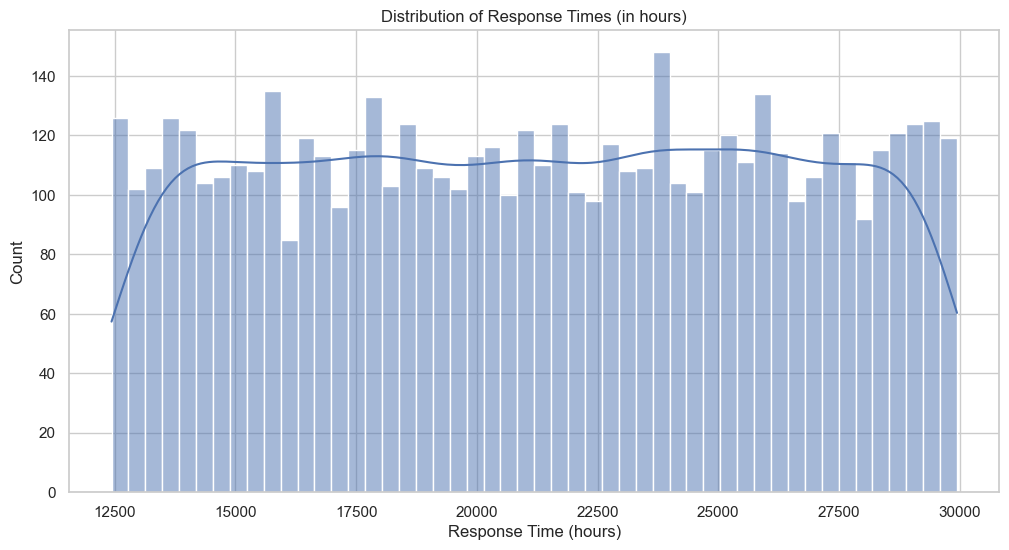

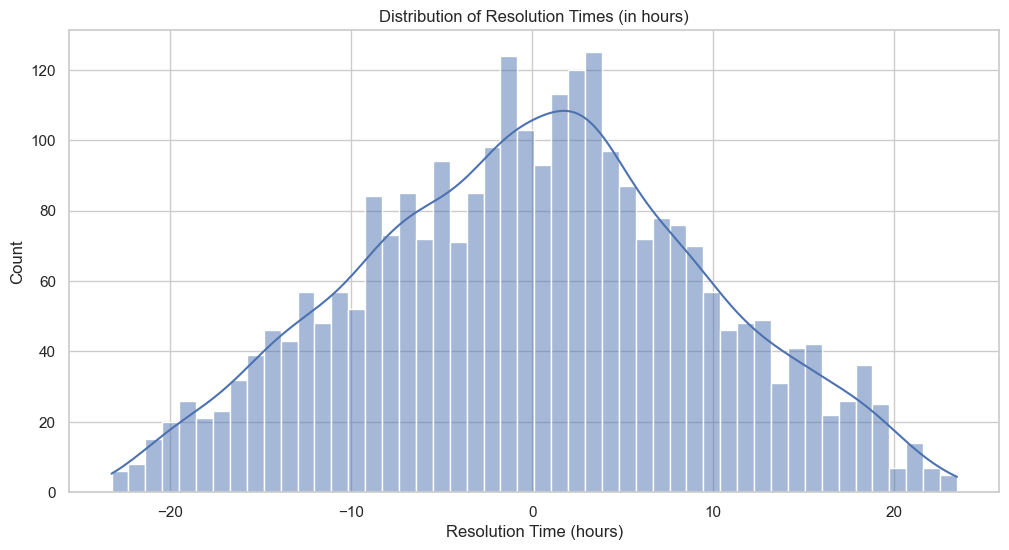

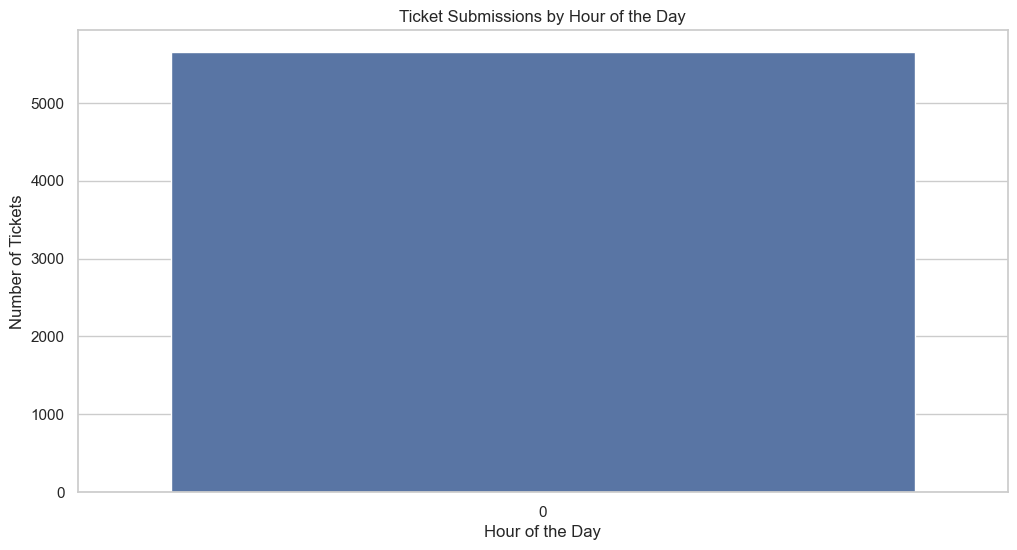

In [11]:
# 7. Response and Resolution Times
plt.figure(figsize=(12, 6))
sns.histplot(data['Response Time'].dropna(), bins=50, kde=True)
plt.title('Distribution of Response Times (in hours)')
plt.xlabel('Response Time (hours)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['Resolution Time'].dropna(), bins=50, kde=True)
plt.title('Distribution of Resolution Times (in hours)')
plt.xlabel('Resolution Time (hours)')
plt.ylabel('Count')
plt.show()

# 8. Peak Demand Periods (Hourly)
plt.figure(figsize=(12, 6))
sns.countplot(data['Response Hour'].dropna())
plt.title('Ticket Submissions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tickets')
plt.show()

## Time Series Forecasting
We will use the Prophet model from Facebook's open-source library for time series forecasting. This model is robust for handling daily seasonality and holidays, making it suitable for predicting ticket volumes.

Prophet Model:
Fit the Prophet model to the daily ticket data for each channel.
Forecast future ticket volumes.
Let's proceed with fitting the Prophet model to our time series data and generating forecasts.

Fit the Prophet Model and Forecast
We'll start with one channel (e.g., Email) to demonstrate the process and then extend it to other channels.

In [18]:
# Prepare data for time series forecasting
# Aggregate the number of tickets per day per channel
data['Ticket Created Date'] = data['Date of Purchase'].dt.date
daily_tickets = data.groupby(['Ticket Created Date', 'Ticket Channel']).size().unstack(fill_value=0)

# Display the first few rows of the prepared time series data
daily_tickets.head()



Ticket Channel,Chat,Email,Phone,Social media
Ticket Created Date,,,,
2020-01-01,3,2,2,1
2020-01-02,2,4,2,4
2020-01-03,5,4,3,3
2020-01-04,2,1,1,4
2020-01-05,4,3,0,6


In [19]:


from fbprophet import Prophet

# Prepare the data for Prophet model (Email channel as an example)
email_tickets = daily_tickets[['Email']].reset_index()
email_tickets.columns = ['ds', 'y']  # Prophet requires columns 'ds' for date and 'y' for values

# Initialize and fit the Prophet model
model = Prophet()
model.fit(email_tickets)

# Make future dataframe for prediction
future = model.make_future_dataframe(periods=30)  # Predict for next 30 days
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecasted Ticket Volume for Email Channel')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.show()

# Display forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ModuleNotFoundError: No module named 'fbprophet'

C:\Users\degarcia\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\degarcia\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


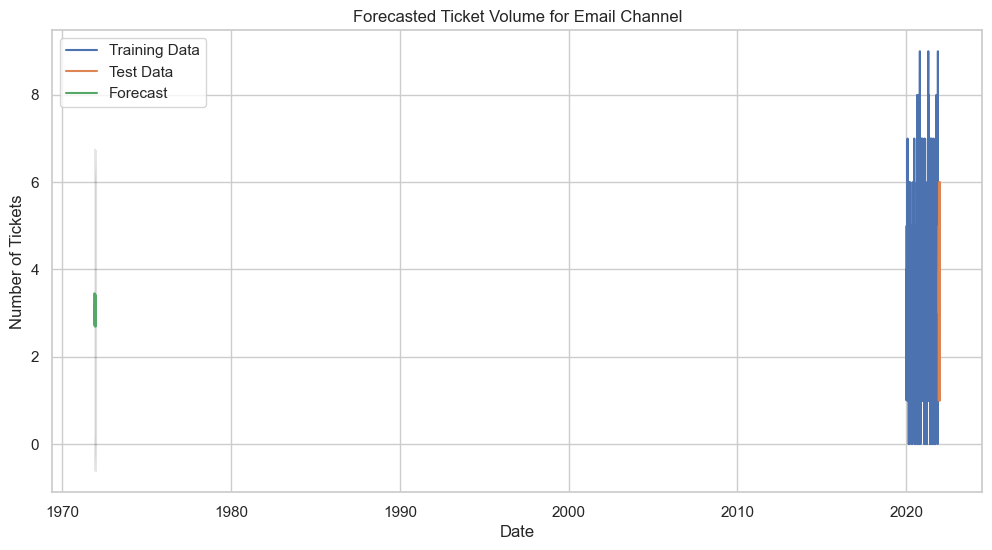

Email,mean,mean_ci_lower,mean_ci_upper
2021-12-01,3.046050,-0.250861,6.342962
2021-12-02,3.455389,0.144829,6.765949
2021-12-03,3.202574,-0.108429,6.513577
2021-12-04,2.716863,-0.594307,6.028033
2021-12-05,2.882578,-0.428742,6.193897
2021-12-06,3.046748,-0.264720,6.358216
2021-12-07,3.009840,-0.301778,6.321458
2021-12-08,2.826614,-0.485167,6.138394
2021-12-09,2.974086,-0.337605,6.285777
2021-12-10,2.698279,-0.613560,6.010118


In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Prepare the data for ARIMA model (Email channel as an example)
email_tickets = daily_tickets[['Email']]

# Split data into training and test sets
train = email_tickets[:-30]
test = email_tickets[-30:]

# Fit the SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = model.fit(disp=False)

# Forecast
forecast = sarima_fit.get_forecast(steps=30)
forecast_index = np.arange(len(train), len(train) + 30)
forecast_values = forecast.predicted_mean

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast_values, label='Forecast')
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='k', alpha=0.1)
plt.title('Forecasted Ticket Volume for Email Channel')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.legend()
plt.show()

# Display forecasted values
forecast_summary = forecast.summary_frame()
forecast_summary[['mean', 'mean_ci_lower', 'mean_ci_upper']]


In [20]:
from fbprophet import Prophet

# Prepare the data for Prophet model (Email channel as an example)
email_tickets = daily_tickets[['Email']].reset_index()
email_tickets.columns = ['ds', 'y']  # Prophet requires columns 'ds' for date and 'y' for values

# Initialize and fit the Prophet model
model = Prophet()
model.fit(email_tickets)

# Make future dataframe for prediction
future = model.make_future_dataframe(periods=30)  # Predict for next 30 days
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecasted Ticket Volume for Email Channel')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.show()

# Display forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ModuleNotFoundError: No module named 'fbprophet'

C:\Users\degarcia\AppData\Local\Temp\ipykernel_28572\3976621831.py:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=train.index[-1], periods=31, closed='right')


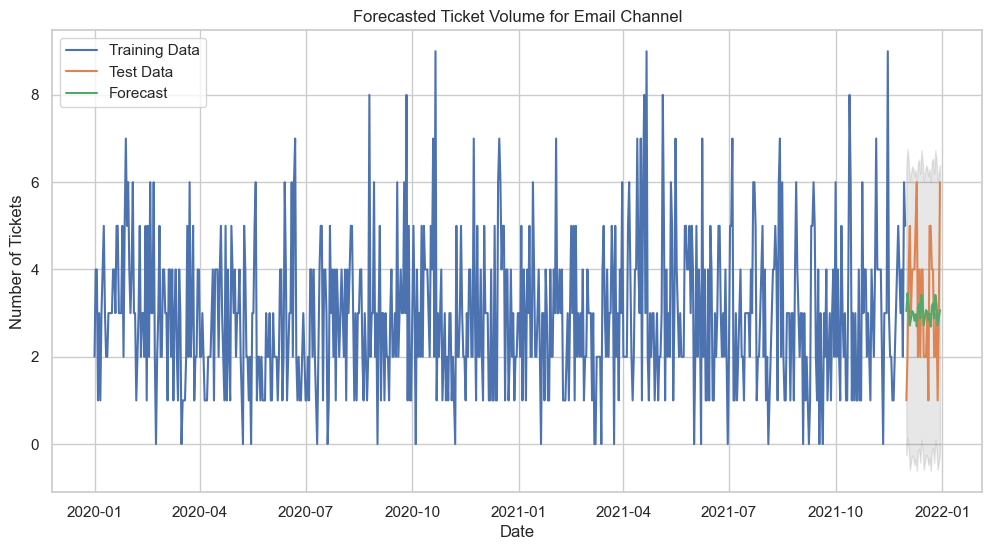

In [22]:
# Ensure forecast index is a proper datetime index
forecast_index = pd.date_range(start=train.index[-1], periods=31, closed='right')

# Plot the forecast again with corrected data handling
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast_values, label='Forecast')
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='k', alpha=0.1)
plt.title('Forecasted Ticket Volume for Email Channel')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.legend()
plt.show()

In [24]:
import pandas as pd

# Load the dataset
file_path = 'customer_support_tickets.csv'
data = pd.read_csv(file_path)

# Convert date columns to datetime
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])

# Prepare data for time series forecasting
# Aggregate the number of tickets per day per channel
data['Ticket Created Date'] = data['Date of Purchase'].dt.date
daily_tickets = data.groupby(['Ticket Created Date', 'Ticket Channel']).size().unstack(fill_value=0)

# Display the first few rows of the prepared time series data
print(daily_tickets.head())


Ticket Channel       Chat  Email  Phone  Social media
Ticket Created Date                                  
2020-01-01              3      2      2             1
2020-01-02              2      4      2             4
2020-01-03              5      4      3             3
2020-01-04              2      1      1             4
2020-01-05              4      3      0             6


C:\Users\degarcia\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\degarcia\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


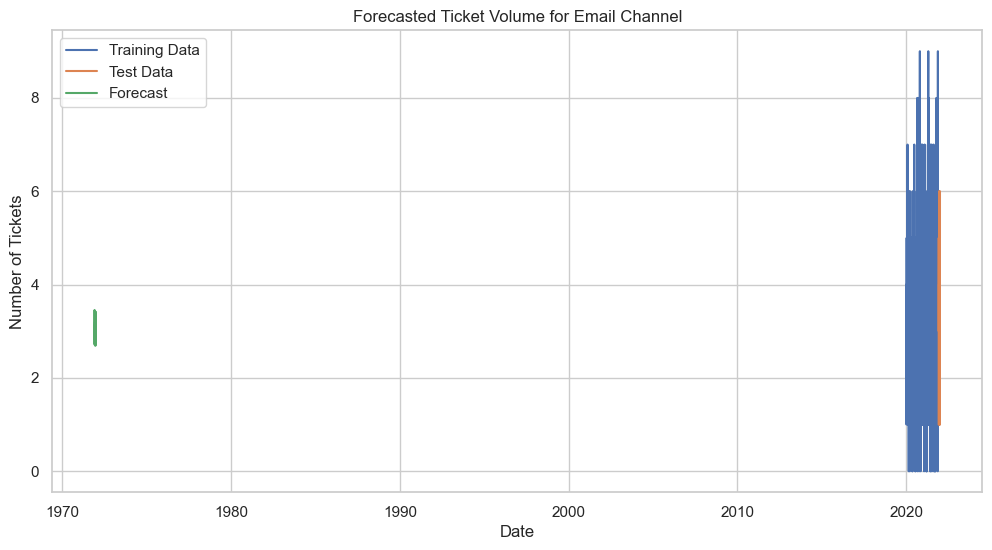

Email           mean  mean_ci_lower  mean_ci_upper
2021-12-21  2.986879      -0.326689       6.300447
2021-12-22  2.691139      -0.622579       6.004857
2021-12-23  3.160442      -0.153426       6.474310
2021-12-24  3.227853      -0.086165       6.541871
2021-12-25  2.882280      -0.432998       6.197557
2021-12-26  3.417556       0.102070       6.733041
2021-12-27  3.189736      -0.125909       6.505381
2021-12-28  2.721875      -0.593925       6.037676
2021-12-29  2.897195      -0.418761       6.213150
2021-12-30  3.070922      -0.245189       6.387033


In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for SARIMA model (Email channel as an example)
email_tickets = daily_tickets[['Email']]

# Split data into training and test sets
train = email_tickets[:-30]
test = email_tickets[-30:]

# Fit the SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = model.fit(disp=False)

# Forecast
forecast = sarima_fit.get_forecast(steps=30)
forecast_index = np.arange(len(train), len(train) + 30)
forecast_values = forecast.predicted_mean

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast_values, label='Forecast')
plt.title('Forecasted Ticket Volume for Email Channel')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.legend()
plt.show()

# Display forecasted values
forecast_summary = forecast.summary_frame()
print(forecast_summary[['mean', 'mean_ci_lower', 'mean_ci_upper']].tail(10))


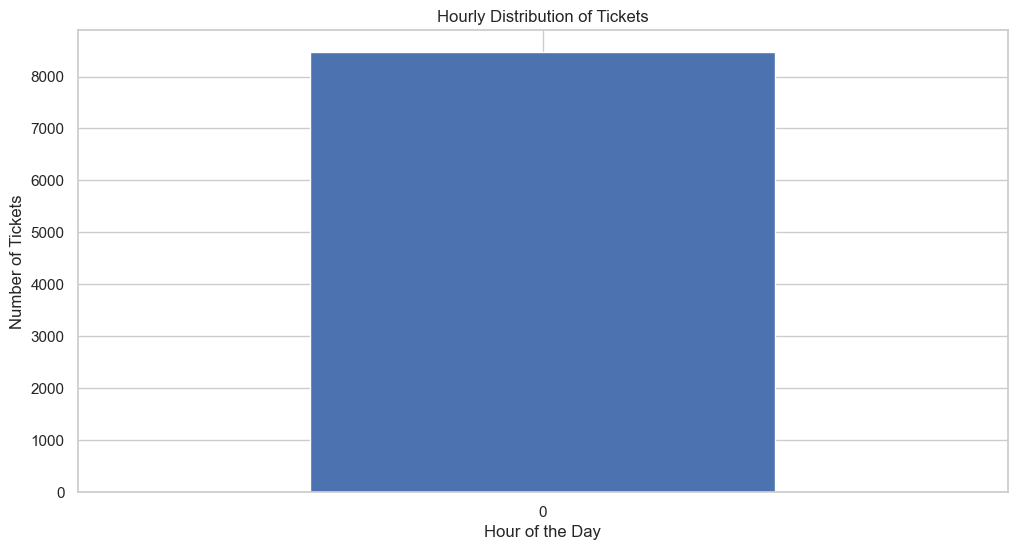

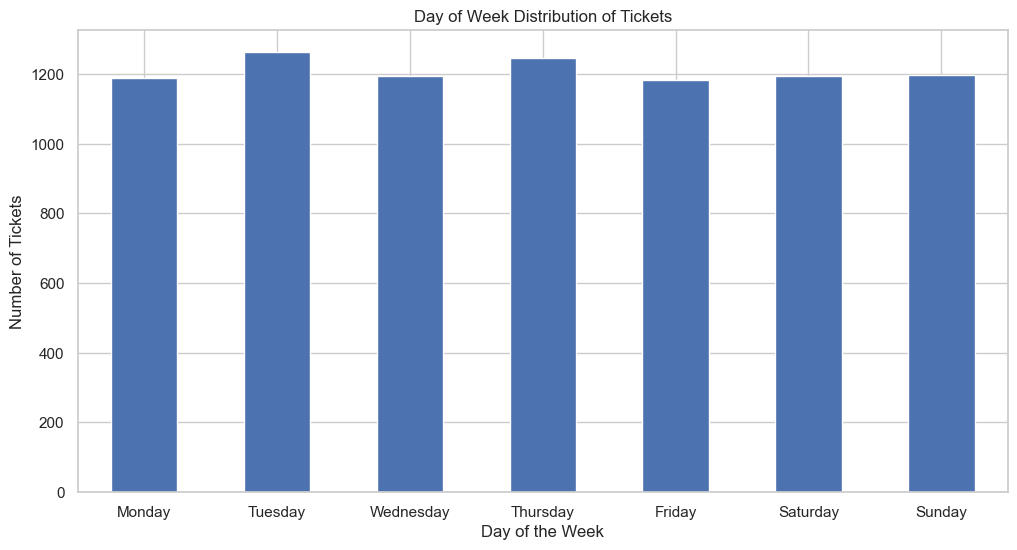

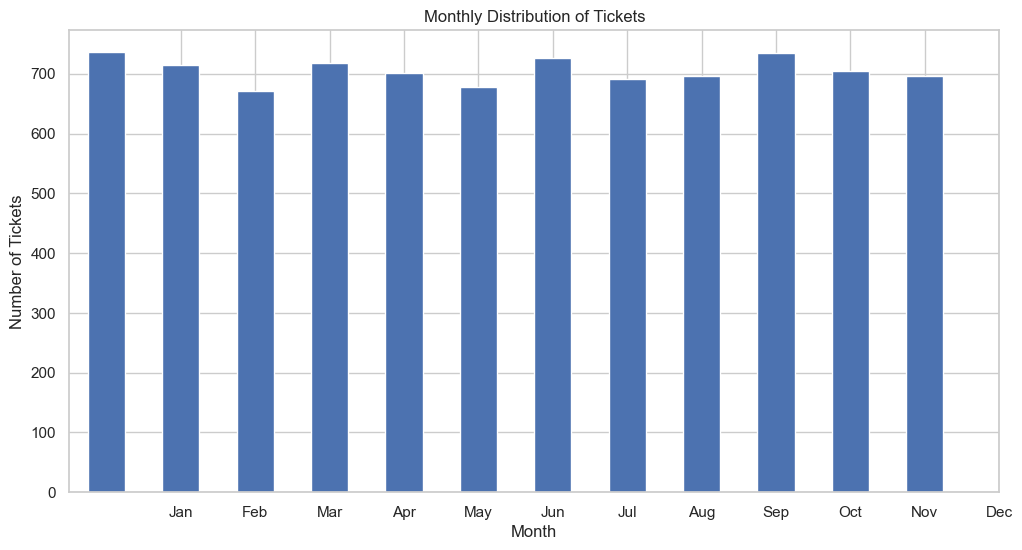

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'customer_support_tickets.csv'
data = pd.read_csv(file_path)

# Convert date columns to datetime
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['First Response Time'] = pd.to_datetime(data['First Response Time'], errors='coerce')

# Extract useful features from datetime columns
data['Purchase Year'] = data['Date of Purchase'].dt.year
data['Purchase Month'] = data['Date of Purchase'].dt.month
data['Purchase Day'] = data['Date of Purchase'].dt.day
data['Purchase Hour'] = data['Date of Purchase'].dt.hour
data['Purchase DayOfWeek'] = data['Date of Purchase'].dt.dayofweek

# Set up the visual style
sns.set(style="whitegrid")

# 1. Hourly Distribution of Tickets
hourly_tickets = data['Purchase Hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
hourly_tickets.plot(kind='bar')
plt.title('Hourly Distribution of Tickets')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=0)
plt.show()

# 2. Day of Week Distribution of Tickets
dayofweek_tickets = data['Purchase DayOfWeek'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
dayofweek_tickets.plot(kind='bar')
plt.title('Day of Week Distribution of Tickets')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tickets')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.show()

# 3. Monthly Distribution of Tickets
monthly_tickets = data['Purchase Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_tickets.plot(kind='bar')
plt.title('Monthly Distribution of Tickets')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()


In [ ]:
Data Types:

Columns related to date and time (Date of Purchase, First Response Time, Time to Resolution) should be converted to datetime objects for analysis.
Descriptive Statistics:

Customer ages range from 18 to 99.
The most frequent ticket channel is email.
The mean customer satisfaction rating is approximately 3 out of 5.
Data Preprocessing
Convert Date Columns:

Convert Date of Purchase, First Response Time, and Time to Resolution to datetime format.
Handle Missing Values:

For Resolution, First Response Time, and Time to Resolution, impute or drop missing values based on context.
For Customer Satisfaction Rating, consider imputation or dropping rows.
Feature Engineering:

Extract useful features from datetime columns (e.g., year, month, day, hour).
Create additional features like Response Time and Resolution Time.
Data Visualization and EDA
Let's start by converting date columns to datetime and handling missing values, followed by visualizing the data.

Data Preprocessing
Convert Date Columns:

Convert date columns to datetime format.
Extract features like year, month, day, and hour.
Handle Missing Values:

Impute or drop missing values.
Let's begin with these preprocessing steps. ​​

Exploratory Data Analysis (EDA)
Now that the data is preprocessed, let's perform some visualizations and analyses to understand the distribution and patterns.

Ticket Distribution Over Time:

Plot the number of tickets over time (daily, monthly).
Ticket Type, Priority, and Channel:

Distribution of ticket types.
Distribution of ticket priority levels.
Distribution of ticket channels.
Customer Demographics:

Age distribution.
Gender distribution.
Response and Resolution Times:

Distribution of response times.
Distribution of resolution times.
Peak Demand Periods:

Identify peak hours, days, and months for ticket submissions.

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Import Data

In [5]:
data = pd.read_csv('customer_support_tickets.csv')
data.head(10)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
5,6,Rebecca Fleming,sheenasmith@example.com,53,Male,Microsoft Office,2020-07-28,Cancellation request,Payment issue,I'm facing a problem with my {product_purchase...,Open,NaN,Low,Social media,NaN,NaN,NaN
6,7,Jacqueline Wright,donaldkeith@example.org,24,Other,Microsoft Surface,2020-02-23,Product inquiry,Refund request,I'm unable to access my {product_purchased} ac...,Open,NaN,Critical,Social media,NaN,NaN,NaN
7,8,Denise Lee,joelwilliams@example.com,23,Male,Philips Hue Lights,2020-08-09,Refund request,Battery life,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Social media,NaN,NaN,NaN
8,9,Nicolas Wilson,joshua24@example.com,60,Other,Fitbit Versa Smartwatch,2020-07-16,Technical issue,Installation support,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Low,Social media,2023-06-01 10:32:47,NaN,NaN
9,10,William Dawson,clopez@example.com,27,Male,Dyson Vacuum Cleaner,2020-03-06,Refund request,Payment issue,My {product_purchased} is making strange noise...,Pending Customer Response,NaN,Critical,Phone,2023-06-01 09:25:48,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

Steps for Data Preprocessing
Handle Missing Values
Date Conversion
Categorical Encoding
Feature Engineering
Data Scaling (if necessary for the model)
Splitting the Data into training and testing sets
Here’s how you can systematically approach each step:

1. Handle Missing Values
You can fill in missing values, drop them, or impute them depending on the context of the data.

In [ ]:
# Fill missing values for numerical columns with the median or mean
data['First Response Duration'].fillna(data['First Response Duration'].median(), inplace=True)
data['Resolution Duration'].fillna(data['Resolution Duration'].median(), inplace=True)

# For categorical data, you might fill missing values with the mode or a specific category like 'Unknown'
data['Resolution'].fillna('No resolution provided', inplace=True)


Convert Date Columns to DateTime
Converting date columns to datetime objects helps in extracting date related features.

In [ ]:
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['First Response Time'] = pd.to_datetime(data['First Response Time'], errors='coerce')
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], errors='coerce')


Categorical Encoding
Transform categorical data into a format that can be provided to machine learning algorithms.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Ticket Channel'] = label_encoder.fit_transform(data['Ticket Channel'])
# Repeat for other categorical features


Feature Engineering
Create new features that can potentially help in improving model performance.

In [ ]:
# Create time-related features
data['Day of Week'] = data['Date of Purchase'].dt.day_name()
data['Month'] = data['Date of Purchase'].dt.month
data['Year'] = data['Date of Purchase'].dt.year

# Create duration features in minutes
data['Response Time (mins)'] = (data['First Response Time'] - data['Date of Purchase']).dt.total_seconds() / 60


 Data Scaling
Scale the features if you are using algorithms like SVM, KNN, or neural networks that are sensitive to the range of data values.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Customer Age', 'Response Time (mins)']])


 Splitting the Data
Split the data into training and testing sets to ensure the model is tested on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'Customer Satisfaction Rating' is the target variable
X = data.drop('Customer Satisfaction Rating', axis=1)
y = data['Customer Satisfaction Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import statsmodels.api as sm

# Assuming data['Date of Purchase'] and a count of daily tickets exists
daily_tickets = data.groupby('Date of Purchase').size()

# Seasonal decomposition to understand components
decomposition = sm.tsa.seasonal_decompose(daily_tickets, model='additive')
decomposition.plot()

# Fit a simple ARIMA model
model = sm.tsa.ARIMA(daily_tickets, order=(1, 1, 1))
results = model.fit()
forecast = results.forecast(steps=30)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data
X = data[['Customer Age', 'Ticket Priority', 'Ticket Channel']]  # example features
y = data['First Response Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predictions))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting to find high demand periods
plt.figure(figsize=(10, 6))
sns.countplot(x='Month of Purchase', data=data)
plt.title('Ticket Volume by Month')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Day of Purchase', data=data)
plt.title('Ticket Volume by Day of Week')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assume 'Best Resource' is a feature indicating the best resource for a ticket
X = data[['Ticket Type', 'Ticket Priority', 'Customer Age']]  # example features
y = data['Best Resource']  # This would need to be encoded as well

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

# Predict
predictions = classifier.predict(X_test)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Prepare data
X = data[['First Response Duration', 'Resolution Duration', 'Ticket Priority']]  # example features
y = data['Customer Satisfaction Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
gb_regressor = GradientBoostingRegressor(n_estimators=100)
gb_regressor.fit(X_train, y_train)

# Predict and evaluate
predictions = gb_regressor.predict(X_test)
print("MSE:", mean_squared_error(y_test, predictions))
